# Hyper-parameters Plot

In [9]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def score_fs(history, weights):
    res = []
    for S in history:
        score = weights[list(S)].sum() / (len(S) + 1)
        res.append(score)
    return np.array(res)

In [11]:
def ideal_hist(weights):
    S = set(range(len(weights)))
    hist = [S.copy()]
    for i in np.argsort(weights):
        S.remove(i)
        hist.append(S.copy())
    return hist

In [46]:
def plot_scores(score_dict, figsize=(9,5)):
    markers = ["x", "o", "^", "v", "s"]
    plt.rcParams.update({'font.size': 18})
    fig = plt.figure(figsize=figsize, constrained_layout=True)
    ax = plt.subplot(111)
    for fs, m in zip(score_dict, markers):
        y = score_dict[fs]
        x = np.arange(len(y))
        ax.step(x, y, where='mid', label=fs, marker=m, alpha=0.5)
    ax.legend()
    plt.xlabel("Number of Features Removed")
    plt.ylabel("Score")
    plt.title("FFS Comparison")
    plt.show()
    return fig

In [30]:
weights = np.array([0.9, 0.9, 0.1, 0.1]*2)

scores = {}
scores['Ideal'] = score_fs(ideal_hist(weights), weights)

In [14]:
with open("benchmarks/results/backward_errors.pkl", 'rb') as f:
    d = pickle.load(f)

In [43]:
for x in d:
    if x[0] == 'LQG_nD' and x[2] == 2000 and x[3] == 40 :
        scores[f'gamma={x[4]}'] = score_fs(map(lambda x: x[0], d[x]), weights)

In [44]:
scores

{'Ideal': array([0.44444444, 0.4875    , 0.54285714, 0.61666667, 0.72      ,
        0.675     , 0.6       , 0.45      , 0.        ]),
 'n=500': array([0.44444444, 0.4875    , 0.54285714, 0.61666667, 0.72      ,
        0.675     , 0.6       , 0.45      , 0.        ]),
 'n=1000': array([0.44444444, 0.4875    , 0.54285714, 0.61666667, 0.72      ,
        0.675     , 0.6       , 0.45      , 0.        ]),
 'n=2000': array([0.44444444, 0.4875    , 0.54285714, 0.61666667, 0.72      ,
        0.675     , 0.6       , 0.45      , 0.        ]),
 'n=5000': array([0.44444444, 0.4875    , 0.54285714, 0.61666667, 0.72      ,
        0.675     , 0.6       , 0.45      , 0.        ]),
 'k=20': array([0.44444444, 0.4875    , 0.54285714, 0.61666667, 0.72      ,
        0.675     , 0.6       , 0.45      , 0.        ]),
 'k=30': array([0.44444444, 0.4875    , 0.54285714, 0.61666667, 0.72      ,
        0.675     , 0.6       , 0.45      , 0.        ]),
 'k=40': array([0.44444444, 0.4875    , 0.54285714, 0.

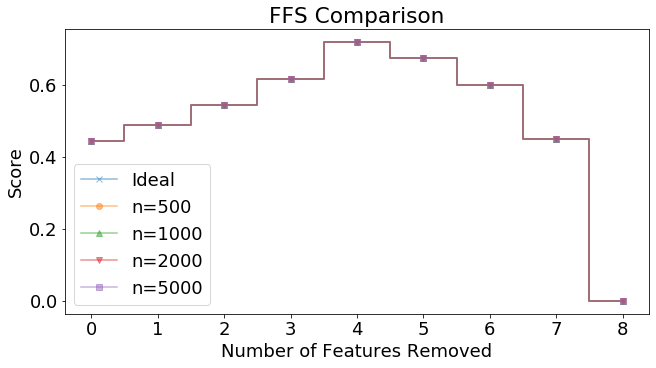

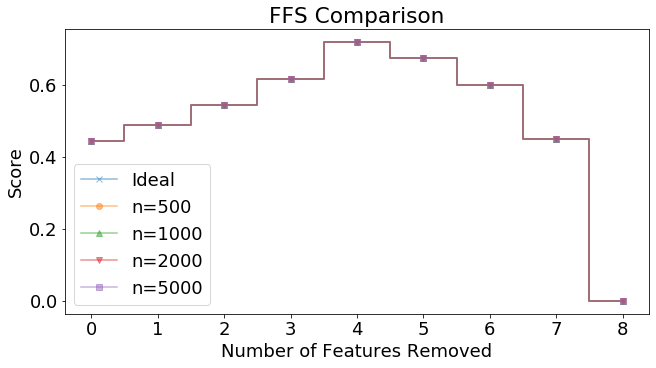

In [47]:
plot_scores(scores)